<a href="https://colab.research.google.com/github/skrzypczykt/MAchineLearningProjects/blob/main/mlp/Tf-IDF-NB/HotelsReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe

In [165]:
import pandas as pd
import numpy as np
import nltk

In [166]:
# df = pd.read_csv('D:\kacpe\Documents\Studia\Seminarium\Praca\Hotel_Reviews.csv')
df = pd.read_csv('/content/Hotel_Reviews.csv')
df.head(10)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[' Leisure trip ', ' Group ', ' Duplex Double ...",10 days,52.360576,4.915968
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",17 days,52.360576,4.915968
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17 days,52.360576,4.915968
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/9/2017,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25 days,52.360576,4.915968
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/8/2017,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[' Leisure trip ', ' Couple ', ' Large King Ro...",26 days,52.360576,4.915968


In [167]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [168]:
scores=df.groupby(['Reviewer_Score']).size()
scores

Reviewer_Score
2.5       2199
2.9       1589
3.0         37
3.1          8
3.3       2772
3.5         79
3.8       4044
4.0         84
4.2       5095
4.4         12
4.5        122
4.6       6240
5.0       8422
5.4       9526
5.5        227
5.6         17
5.8      12034
6.0        253
6.3      14924
6.5        345
6.7      18793
6.9         29
7.0        411
7.1      24855
7.5      34878
7.9      33097
8.0        505
8.1         39
8.3      41128
8.5        508
8.8      46429
9.0        647
9.2      58583
9.4         63
9.5        724
9.6      71167
10.0    115853
dtype: int64

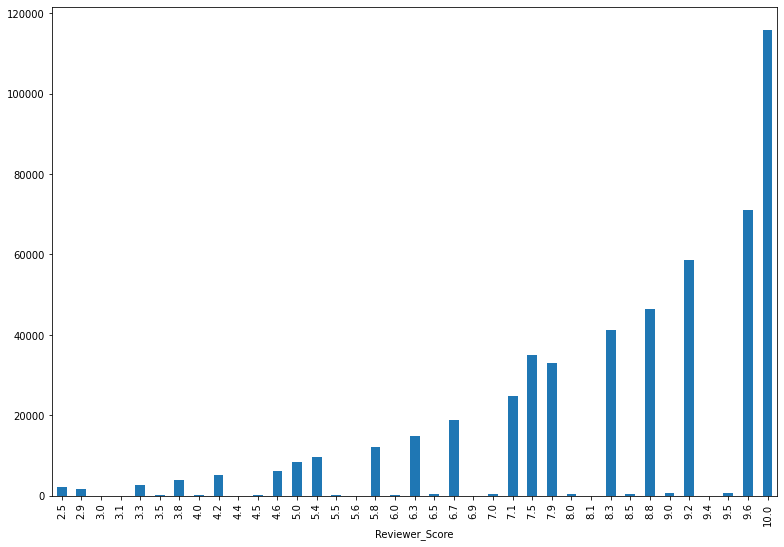

In [169]:
bar_plot=scores.plot.bar(x='Reviewer_Score', figsize=(13,9))

In [170]:
cumsum=scores.cumsum()
cumsum

Reviewer_Score
2.5       2199
2.9       3788
3.0       3825
3.1       3833
3.3       6605
3.5       6684
3.8      10728
4.0      10812
4.2      15907
4.4      15919
4.5      16041
4.6      22281
5.0      30703
5.4      40229
5.5      40456
5.6      40473
5.8      52507
6.0      52760
6.3      67684
6.5      68029
6.7      86822
6.9      86851
7.0      87262
7.1     112117
7.5     146995
7.9     180092
8.0     180597
8.1     180636
8.3     221764
8.5     222272
8.8     268701
9.0     269348
9.2     327931
9.4     327994
9.5     328718
9.6     399885
10.0    515738
dtype: int64

In [171]:
reduced_df = df.drop(columns=['Average_Score','Hotel_Address', 'Additional_Number_of_Scoring','Review_Total_Negative_Word_Counts', 'Review_Date','Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews','Hotel_Name', 'Reviewer_Nationality', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'days_since_review', 'lat', 'lng', 'Tags'])
reduced_df.head()

,Negative_Review,Positive_Review,Reviewer_Score
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9
1,No Negative,No real complaints the hotel was great great ...,7.5
2,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1
3,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,3.8
4,You When I booked with your company on line y...,Amazing location and building Romantic setting,6.7


In [172]:
# reduced_df=reduced_df.loc[(reduced_df['Reviewer_Score'] <= 6.9) | (reduced_df['Reviewer_Score'] >= 8.8)]
reduced_df=reduced_df.loc[(reduced_df['Reviewer_Score'] <= 6.9) | (reduced_df['Reviewer_Score'] >= 9.5)]
reduced_df.head(10)

,Negative_Review,Positive_Review,Reviewer_Score
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9
3,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,3.8
4,You When I booked with your company on line y...,Amazing location and building Romantic setting,6.7
5,Backyard of the hotel is total mess shouldn t...,Good restaurant with modern design great chil...,6.7
6,Cleaner did not change our sheet and duvet ev...,The room is spacious and bright The hotel is ...,4.6
7,Apart from the price for the brekfast Everyth...,Good location Set in a lovely park friendly s...,10.0
8,Even though the pictures show very clean room...,No Positive,6.5
10,Nothing all great,Rooms were stunningly decorated and really sp...,10.0
11,6 30 AM started big noise workers loading woo...,Style location rooms,5.8
12,The floor in my room was filfy dirty Very bas...,Comfy bed good location,4.6


In [173]:
reduced_df.shape

(380317, 3)

In [174]:
positive_reviews=reduced_df.loc[reduced_df['Reviewer_Score'] >= 8.8]
positive_reviews=positive_reviews.drop(columns='Negative_Review')
positive_reviews.head(10)

,Positive_Review,Reviewer_Score
7,Good location Set in a lovely park friendly s...,10.0
10,Rooms were stunningly decorated and really sp...,10.0
13,This hotel is being renovated with great care...,9.2
14,It was very good very historic building that ...,8.8
15,This hotel is awesome I took it sincirely bec...,10.0
23,Bed was extremely comfy and the staff where w...,9.6
24,Lovely hotel with extremely comfortable huge ...,9.6
26,The Hotel itself is in a lovely location a 5m...,9.6
29,The hotel is located in a beautiful old monas...,9.2
30,The staff were so friendly and helpful plus t...,9.2


In [175]:
negative_reviews=reduced_df.loc[reduced_df['Reviewer_Score'] <= 6.9]
negative_reviews=negative_reviews.drop(columns='Positive_Review')
negative_reviews.head(10)

,Negative_Review,Reviewer_Score
0,I am so angry that i made this post available...,2.9
3,My room was dirty and I was afraid to walk ba...,3.8
4,You When I booked with your company on line y...,6.7
5,Backyard of the hotel is total mess shouldn t...,6.7
6,Cleaner did not change our sheet and duvet ev...,4.6
8,Even though the pictures show very clean room...,6.5
11,6 30 AM started big noise workers loading woo...,5.8
12,The floor in my room was filfy dirty Very bas...,4.6
16,Very steep steps in room up to the bed not sa...,6.3
20,Bed was on upper level with a narrow twist st...,6.3


### Text preprocessing

#### Lowercase

In [176]:
negative_reviews.loc[:,"Negative_Review_lower"] = negative_reviews.Negative_Review.apply(lambda x : str.lower(x))
negative_reviews.head()

,Negative_Review,Reviewer_Score,Negative_Review_lower
0,I am so angry that i made this post available...,2.9,i am so angry that i made this post available...
3,My room was dirty and I was afraid to walk ba...,3.8,my room was dirty and i was afraid to walk ba...
4,You When I booked with your company on line y...,6.7,you when i booked with your company on line y...
5,Backyard of the hotel is total mess shouldn t...,6.7,backyard of the hotel is total mess shouldn t...
6,Cleaner did not change our sheet and duvet ev...,4.6,cleaner did not change our sheet and duvet ev...


In [177]:
positive_reviews.loc[:,"Positive_Review_lower"] = positive_reviews.Positive_Review.apply(lambda x : str.lower(x))
positive_reviews.head()

,Positive_Review,Reviewer_Score,Positive_Review_lower
7,Good location Set in a lovely park friendly s...,10.0,good location set in a lovely park friendly s...
10,Rooms were stunningly decorated and really sp...,10.0,rooms were stunningly decorated and really sp...
13,This hotel is being renovated with great care...,9.2,this hotel is being renovated with great care...
14,It was very good very historic building that ...,8.8,it was very good very historic building that ...
15,This hotel is awesome I took it sincirely bec...,10.0,this hotel is awesome i took it sincirely bec...


#### Stopwords

In [178]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [179]:
from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english')) 

def remove_stopWords(s):
    s = ' '.join(word for word in s.split() if word not in stop_words)
    return s

negative_reviews.loc[:,"Negative_Review_lower"] = negative_reviews.Negative_Review_lower.apply(lambda x: remove_stopWords(x))

negative_reviews.head()

,Negative_Review,Reviewer_Score,Negative_Review_lower
0,I am so angry that i made this post available...,2.9,angry made post available via possible sites u...
3,My room was dirty and I was afraid to walk ba...,3.8,room dirty afraid walk barefoot floor looked c...
4,You When I booked with your company on line y...,6.7,booked company line showed pictures room thoug...
5,Backyard of the hotel is total mess shouldn t...,6.7,backyard hotel total mess happen hotel 4 stars
6,Cleaner did not change our sheet and duvet ev...,4.6,cleaner change sheet duvet everyday made bed a...


In [180]:
positive_reviews.loc[:,"Positive_Review_lower"] = positive_reviews.Positive_Review_lower.apply(lambda x: remove_stopWords(x))
positive_reviews.head()

,Positive_Review,Reviewer_Score,Positive_Review_lower
7,Good location Set in a lovely park friendly s...,10.0,good location set lovely park friendly staff f...
10,Rooms were stunningly decorated and really sp...,10.0,rooms stunningly decorated really spacious top...
13,This hotel is being renovated with great care...,9.2,hotel renovated great care appreciation unique...
14,It was very good very historic building that ...,8.8,good historic building chose
15,This hotel is awesome I took it sincirely bec...,10.0,hotel awesome took sincirely bit cheaper struc...


In [181]:
print(stop_words)

{'no', 'do', 'too', "you'd", 've', 'further', 'am', 'most', "should've", 'theirs', 'more', 'down', "wasn't", 'where', 'into', 'o', 'i', 'ourselves', 'your', 'will', 'didn', "you've", "aren't", 'himself', 'these', 'but', 'those', 'this', 'before', "haven't", 'weren', 'above', 'myself', 'now', 'for', 'once', 'd', 'have', "needn't", 'at', 'just', 'haven', "mustn't", "you're", "she's", 'through', 'had', "it's", "won't", 'against', 'than', 'our', 'him', 'off', 'any', 'nor', 'by', 'and', 'wouldn', 'did', 'other', 'should', 'their', 'being', 'all', 'were', 'he', 'an', 'doing', 'of', 'that', 'then', 'you', 'both', 'ain', 's', 'hadn', 'only', 'shouldn', 'with', 'to', 'itself', 'if', 'over', 'ours', 'up', "that'll", 'under', 'out', 'they', 'between', "mightn't", 'very', 'we', 't', 'in', 'is', 'isn', 'how', 'it', 'yourself', 'does', 'them', 'was', "you'll", 'the', 'about', 'whom', 'shan', 'from', 'when', "wouldn't", 'my', 'be', 'while', 'so', 'having', 'can', 'here', 'she', 'won', "shouldn't", "s

#### Tokenizing

In [182]:
# nltk tokenize method



# def identify_tokens(row):
#     neg_tokens = nltk.word_tokenize(row)
#     # taken only words (not punctuation)
#     neg_token_words = [w for w in neg_tokens if w.isalpha()]
#     return neg_token_words

def identify_neg_tokens(row):
    neg_review = row['Negative_Review_lower']
    neg_tokens = nltk.word_tokenize(neg_review)
    # taken only words (not punctuation)
    neg_token_words = [w for w in neg_tokens if w.isalpha()]
    return neg_token_words

negative_reviews['Negative_Review_tokens'] = negative_reviews.apply(identify_neg_tokens, axis=1)
negative_reviews.head()

,Negative_Review,Reviewer_Score,Negative_Review_lower,Negative_Review_tokens
0,I am so angry that i made this post available...,2.9,angry made post available via possible sites u...,"[angry, made, post, available, via, possible, ..."
3,My room was dirty and I was afraid to walk ba...,3.8,room dirty afraid walk barefoot floor looked c...,"[room, dirty, afraid, walk, barefoot, floor, l..."
4,You When I booked with your company on line y...,6.7,booked company line showed pictures room thoug...,"[booked, company, line, showed, pictures, room..."
5,Backyard of the hotel is total mess shouldn t...,6.7,backyard hotel total mess happen hotel 4 stars,"[backyard, hotel, total, mess, happen, hotel, ..."
6,Cleaner did not change our sheet and duvet ev...,4.6,cleaner change sheet duvet everyday made bed a...,"[cleaner, change, sheet, duvet, everyday, made..."


In [183]:
def identify_pos_tokens(row):
    pos_review = row['Positive_Review_lower']
    pos_tokens = nltk.word_tokenize(pos_review)
    # taken only words (not punctuation)
    pos_token_words = [w for w in pos_tokens if w.isalpha()]
    return pos_token_words

positive_reviews['Positive_Review_tokens'] = positive_reviews.apply(identify_pos_tokens, axis=1)
positive_reviews.head()

,Positive_Review,Reviewer_Score,Positive_Review_lower,Positive_Review_tokens
7,Good location Set in a lovely park friendly s...,10.0,good location set lovely park friendly staff f...,"[good, location, set, lovely, park, friendly, ..."
10,Rooms were stunningly decorated and really sp...,10.0,rooms stunningly decorated really spacious top...,"[rooms, stunningly, decorated, really, spaciou..."
13,This hotel is being renovated with great care...,9.2,hotel renovated great care appreciation unique...,"[hotel, renovated, great, care, appreciation, ..."
14,It was very good very historic building that ...,8.8,good historic building chose,"[good, historic, building, chose]"
15,This hotel is awesome I took it sincirely bec...,10.0,hotel awesome took sincirely bit cheaper struc...,"[hotel, awesome, took, sincirely, bit, cheaper..."


#### Stemming

In [184]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

def neg_stem_list(row):
    my_list = row['Negative_Review_tokens']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

negative_reviews['Negative_Review_Stemmed'] = negative_reviews.apply(neg_stem_list, axis=1)
negative_reviews.head()

,Negative_Review,Reviewer_Score,Negative_Review_lower,Negative_Review_tokens,Negative_Review_Stemmed
0,I am so angry that i made this post available...,2.9,angry made post available via possible sites u...,"[angry, made, post, available, via, possible, ...","[angri, made, post, avail, via, possibl, site,..."
3,My room was dirty and I was afraid to walk ba...,3.8,room dirty afraid walk barefoot floor looked c...,"[room, dirty, afraid, walk, barefoot, floor, l...","[room, dirti, afraid, walk, barefoot, floor, l..."
4,You When I booked with your company on line y...,6.7,booked company line showed pictures room thoug...,"[booked, company, line, showed, pictures, room...","[book, compani, line, show, pictur, room, thou..."
5,Backyard of the hotel is total mess shouldn t...,6.7,backyard hotel total mess happen hotel 4 stars,"[backyard, hotel, total, mess, happen, hotel, ...","[backyard, hotel, total, mess, happen, hotel, ..."
6,Cleaner did not change our sheet and duvet ev...,4.6,cleaner change sheet duvet everyday made bed a...,"[cleaner, change, sheet, duvet, everyday, made...","[cleaner, chang, sheet, duvet, everyday, made,..."


In [185]:
def pos_stem_list(row):
    my_list = row['Positive_Review_tokens']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

positive_reviews['Positive_Review_Stemmed'] = positive_reviews.apply(pos_stem_list, axis=1)
positive_reviews.head()

,Positive_Review,Reviewer_Score,Positive_Review_lower,Positive_Review_tokens,Positive_Review_Stemmed
7,Good location Set in a lovely park friendly s...,10.0,good location set lovely park friendly staff f...,"[good, location, set, lovely, park, friendly, ...","[good, locat, set, love, park, friendli, staff..."
10,Rooms were stunningly decorated and really sp...,10.0,rooms stunningly decorated really spacious top...,"[rooms, stunningly, decorated, really, spaciou...","[room, stunningli, decor, realli, spaciou, top..."
13,This hotel is being renovated with great care...,9.2,hotel renovated great care appreciation unique...,"[hotel, renovated, great, care, appreciation, ...","[hotel, renov, great, care, appreci, uniqu, st..."
14,It was very good very historic building that ...,8.8,good historic building chose,"[good, historic, building, chose]","[good, histor, build, chose]"
15,This hotel is awesome I took it sincirely bec...,10.0,hotel awesome took sincirely bit cheaper struc...,"[hotel, awesome, took, sincirely, bit, cheaper...","[hotel, awesom, took, sincir, bit, cheaper, st..."


#Whole preprocessing pipeline

In [212]:
def preprocess(opinion):
  opinion = str.lower(opinion)
  opinion = remove_stopWords(opinion)
  opinion = [stemming.stem(word) for word in nltk.word_tokenize(opinion) if word.isalpha()]
  return opinion

In [213]:
negative_reviews.Negative_Review[0]

' I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to begin y

In [214]:
preprocess(negative_reviews.Negative_Review[0])

['angri',
 'made',
 'post',
 'avail',
 'via',
 'possibl',
 'site',
 'use',
 'plane',
 'trip',
 'one',
 'make',
 'mistak',
 'book',
 'place',
 'made',
 'book',
 'via',
 'book',
 'com',
 'stay',
 'night',
 'hotel',
 'juli',
 'upon',
 'arriv',
 'place',
 'small',
 'room',
 'floor',
 'hotel',
 'turn',
 'room',
 'book',
 'special',
 'reserv',
 'level',
 'duplex',
 'room',
 'would',
 'big',
 'window',
 'high',
 'ceil',
 'room',
 'ok',
 'mind',
 'broken',
 'window',
 'close',
 'hello',
 'rain',
 'mini',
 'fridg',
 'contain',
 'sort',
 'bio',
 'weapon',
 'least',
 'guess',
 'smell',
 'intim',
 'ask',
 'chang',
 'room',
 'explain',
 'time',
 'book',
 'duplex',
 'btw',
 'cost',
 'simpl',
 'doubl',
 'got',
 'way',
 'volum',
 'due',
 'high',
 'ceil',
 'offer',
 'room',
 'next',
 'day',
 'check',
 'next',
 'day',
 'clock',
 'order',
 'get',
 'room',
 'wane',
 'best',
 'way',
 'begin',
 'holiday',
 'wait',
 'till',
 'order',
 'check',
 'new',
 'room',
 'wonder',
 'waist',
 'time',
 'room',
 'got',
 

#Reshaping

In [189]:
negative_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86851 entries, 0 to 515735
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Negative_Review          86851 non-null  object 
 1   Reviewer_Score           86851 non-null  float64
 2   Negative_Review_lower    86851 non-null  object 
 3   Negative_Review_tokens   86851 non-null  object 
 4   Negative_Review_Stemmed  86851 non-null  object 
dtypes: float64(1), object(4)
memory usage: 6.5+ MB


In [190]:
negative_reviews=negative_reviews.reset_index(drop=True)
negative_reviews.head(10)

,Negative_Review,Reviewer_Score,Negative_Review_lower,Negative_Review_tokens,Negative_Review_Stemmed
0,I am so angry that i made this post available...,2.9,angry made post available via possible sites u...,"[angry, made, post, available, via, possible, ...","[angri, made, post, avail, via, possibl, site,..."
1,My room was dirty and I was afraid to walk ba...,3.8,room dirty afraid walk barefoot floor looked c...,"[room, dirty, afraid, walk, barefoot, floor, l...","[room, dirti, afraid, walk, barefoot, floor, l..."
2,You When I booked with your company on line y...,6.7,booked company line showed pictures room thoug...,"[booked, company, line, showed, pictures, room...","[book, compani, line, show, pictur, room, thou..."
3,Backyard of the hotel is total mess shouldn t...,6.7,backyard hotel total mess happen hotel 4 stars,"[backyard, hotel, total, mess, happen, hotel, ...","[backyard, hotel, total, mess, happen, hotel, ..."
4,Cleaner did not change our sheet and duvet ev...,4.6,cleaner change sheet duvet everyday made bed a...,"[cleaner, change, sheet, duvet, everyday, made...","[cleaner, chang, sheet, duvet, everyday, made,..."
5,Even though the pictures show very clean room...,6.5,even though pictures show clean rooms actual r...,"[even, though, pictures, show, clean, rooms, a...","[even, though, pictur, show, clean, room, actu..."
6,6 30 AM started big noise workers loading woo...,5.8,6 30 started big noise workers loading wood wi...,"[started, big, noise, workers, loading, wood, ...","[start, big, nois, worker, load, wood, window,..."
7,The floor in my room was filfy dirty Very bas...,4.6,floor room filfy dirty basic rooms 20yr old tv...,"[floor, room, filfy, dirty, basic, rooms, old,...","[floor, room, filfi, dirti, basic, room, old, ..."
8,Very steep steps in room up to the bed not sa...,6.3,steep steps room bed safe children asked move ...,"[steep, steps, room, bed, safe, children, aske...","[steep, step, room, bed, safe, children, ask, ..."
9,Bed was on upper level with a narrow twist st...,6.3,bed upper level narrow twist staircase usb por...,"[bed, upper, level, narrow, twist, staircase, ...","[bed, upper, level, narrow, twist, staircas, u..."


In [191]:
positive_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293466 entries, 7 to 515736
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Positive_Review          293466 non-null  object 
 1   Reviewer_Score           293466 non-null  float64
 2   Positive_Review_lower    293466 non-null  object 
 3   Positive_Review_tokens   293466 non-null  object 
 4   Positive_Review_Stemmed  293466 non-null  object 
dtypes: float64(1), object(4)
memory usage: 13.4+ MB


In [192]:
positive_reviews=positive_reviews.reset_index(drop=True)
positive_reviews.head(10)

,Positive_Review,Reviewer_Score,Positive_Review_lower,Positive_Review_tokens,Positive_Review_Stemmed
0,Good location Set in a lovely park friendly s...,10.0,good location set lovely park friendly staff f...,"[good, location, set, lovely, park, friendly, ...","[good, locat, set, love, park, friendli, staff..."
1,Rooms were stunningly decorated and really sp...,10.0,rooms stunningly decorated really spacious top...,"[rooms, stunningly, decorated, really, spaciou...","[room, stunningli, decor, realli, spaciou, top..."
2,This hotel is being renovated with great care...,9.2,hotel renovated great care appreciation unique...,"[hotel, renovated, great, care, appreciation, ...","[hotel, renov, great, care, appreci, uniqu, st..."
3,It was very good very historic building that ...,8.8,good historic building chose,"[good, historic, building, chose]","[good, histor, build, chose]"
4,This hotel is awesome I took it sincirely bec...,10.0,hotel awesome took sincirely bit cheaper struc...,"[hotel, awesome, took, sincirely, bit, cheaper...","[hotel, awesom, took, sincir, bit, cheaper, st..."
5,Bed was extremely comfy and the staff where w...,9.6,bed extremely comfy staff well spoken also gav...,"[bed, extremely, comfy, staff, well, spoken, a...","[bed, extrem, comfi, staff, well, spoken, also..."
6,Lovely hotel with extremely comfortable huge ...,9.6,lovely hotel extremely comfortable huge double...,"[lovely, hotel, extremely, comfortable, huge, ...","[love, hotel, extrem, comfort, huge, doubl, be..."
7,The Hotel itself is in a lovely location a 5m...,9.6,hotel lovely location 5min tram ride center tr...,"[hotel, lovely, location, tram, ride, center, ...","[hotel, love, locat, tram, ride, center, train..."
8,The hotel is located in a beautiful old monas...,9.2,hotel located beautiful old monastery building...,"[hotel, located, beautiful, old, monastery, bu...","[hotel, locat, beauti, old, monasteri, build, ..."
9,The staff were so friendly and helpful plus t...,9.2,staff friendly helpful plus bar restaurant are...,"[staff, friendly, helpful, plus, bar, restaura...","[staff, friendli, help, plu, bar, restaur, are..."


In [193]:
def neg_final_review(row):
    neg_review = row['Negative_Review_Stemmed']
    review = " ".join(neg_review)
    return review

negative_reviews['Final_review'] = negative_reviews.apply(neg_final_review, axis=1)

negative_reviews.head(10)

,Negative_Review,Reviewer_Score,Negative_Review_lower,Negative_Review_tokens,Negative_Review_Stemmed,Final_review
0,I am so angry that i made this post available...,2.9,angry made post available via possible sites u...,"[angry, made, post, available, via, possible, ...","[angri, made, post, avail, via, possibl, site,...",angri made post avail via possibl site use pla...
1,My room was dirty and I was afraid to walk ba...,3.8,room dirty afraid walk barefoot floor looked c...,"[room, dirty, afraid, walk, barefoot, floor, l...","[room, dirti, afraid, walk, barefoot, floor, l...",room dirti afraid walk barefoot floor look cle...
2,You When I booked with your company on line y...,6.7,booked company line showed pictures room thoug...,"[booked, company, line, showed, pictures, room...","[book, compani, line, show, pictur, room, thou...",book compani line show pictur room thought get...
3,Backyard of the hotel is total mess shouldn t...,6.7,backyard hotel total mess happen hotel 4 stars,"[backyard, hotel, total, mess, happen, hotel, ...","[backyard, hotel, total, mess, happen, hotel, ...",backyard hotel total mess happen hotel star
4,Cleaner did not change our sheet and duvet ev...,4.6,cleaner change sheet duvet everyday made bed a...,"[cleaner, change, sheet, duvet, everyday, made...","[cleaner, chang, sheet, duvet, everyday, made,...",cleaner chang sheet duvet everyday made bed al...
5,Even though the pictures show very clean room...,6.5,even though pictures show clean rooms actual r...,"[even, though, pictures, show, clean, rooms, a...","[even, though, pictur, show, clean, room, actu...",even though pictur show clean room actual room...
6,6 30 AM started big noise workers loading woo...,5.8,6 30 started big noise workers loading wood wi...,"[started, big, noise, workers, loading, wood, ...","[start, big, nois, worker, load, wood, window,...",start big nois worker load wood window stupid ...
7,The floor in my room was filfy dirty Very bas...,4.6,floor room filfy dirty basic rooms 20yr old tv...,"[floor, room, filfy, dirty, basic, rooms, old,...","[floor, room, filfi, dirti, basic, room, old, ...",floor room filfi dirti basic room old tv room ...
8,Very steep steps in room up to the bed not sa...,6.3,steep steps room bed safe children asked move ...,"[steep, steps, room, bed, safe, children, aske...","[steep, step, room, bed, safe, children, ask, ...",steep step room bed safe children ask move roo...
9,Bed was on upper level with a narrow twist st...,6.3,bed upper level narrow twist staircase usb por...,"[bed, upper, level, narrow, twist, staircase, ...","[bed, upper, level, narrow, twist, staircas, u...",bed upper level narrow twist staircas usb port...


In [194]:
def pos_final_review(row):
    pos_review = row['Positive_Review_Stemmed']
    review = " ".join(pos_review)
    return review

positive_reviews['Final_review'] = positive_reviews.apply(pos_final_review, axis=1)

positive_reviews.head(10)

,Positive_Review,Reviewer_Score,Positive_Review_lower,Positive_Review_tokens,Positive_Review_Stemmed,Final_review
0,Good location Set in a lovely park friendly s...,10.0,good location set lovely park friendly staff f...,"[good, location, set, lovely, park, friendly, ...","[good, locat, set, love, park, friendli, staff...",good locat set love park friendli staff food h...
1,Rooms were stunningly decorated and really sp...,10.0,rooms stunningly decorated really spacious top...,"[rooms, stunningly, decorated, really, spaciou...","[room, stunningli, decor, realli, spaciou, top...",room stunningli decor realli spaciou top build...
2,This hotel is being renovated with great care...,9.2,hotel renovated great care appreciation unique...,"[hotel, renovated, great, care, appreciation, ...","[hotel, renov, great, care, appreci, uniqu, st...",hotel renov great care appreci uniqu structur ...
3,It was very good very historic building that ...,8.8,good historic building chose,"[good, historic, building, chose]","[good, histor, build, chose]",good histor build chose
4,This hotel is awesome I took it sincirely bec...,10.0,hotel awesome took sincirely bit cheaper struc...,"[hotel, awesome, took, sincirely, bit, cheaper...","[hotel, awesom, took, sincir, bit, cheaper, st...",hotel awesom took sincir bit cheaper structur ...
5,Bed was extremely comfy and the staff where w...,9.6,bed extremely comfy staff well spoken also gav...,"[bed, extremely, comfy, staff, well, spoken, a...","[bed, extrem, comfi, staff, well, spoken, also...",bed extrem comfi staff well spoken also gave u...
6,Lovely hotel with extremely comfortable huge ...,9.6,lovely hotel extremely comfortable huge double...,"[lovely, hotel, extremely, comfortable, huge, ...","[love, hotel, extrem, comfort, huge, doubl, be...",love hotel extrem comfort huge doubl bed stay ...
7,The Hotel itself is in a lovely location a 5m...,9.6,hotel lovely location 5min tram ride center tr...,"[hotel, lovely, location, tram, ride, center, ...","[hotel, love, locat, tram, ride, center, train...",hotel love locat tram ride center train right ...
8,The hotel is located in a beautiful old monas...,9.2,hotel located beautiful old monastery building...,"[hotel, located, beautiful, old, monastery, bu...","[hotel, locat, beauti, old, monasteri, build, ...",hotel locat beauti old monasteri build special...
9,The staff were so friendly and helpful plus t...,9.2,staff friendly helpful plus bar restaurant are...,"[staff, friendly, helpful, plus, bar, restaura...","[staff, friendli, help, plu, bar, restaur, are...",staff friendli help plu bar restaur area beaut...


In [195]:
negative_reviews_list = negative_reviews['Final_review'].tolist()
print (negative_reviews_list[0:10])

['angri made post avail via possibl site use plane trip one make mistak book place made book via book com stay night hotel juli upon arriv place small room floor hotel turn room book special reserv level duplex room would big window high ceil room ok mind broken window close hello rain mini fridg contain sort bio weapon least guess smell intim ask chang room explain time book duplex btw cost simpl doubl got way volum due high ceil offer room next day check next day clock order get room wane best way begin holiday wait till order check new room wonder waist time room got want peac intern garden view big window tire wait room place belong rush citi even turn constant nois room guess made vibrat vent tube someth constant annoy hell stop even make hard fall asleep wife audio record attach want send via e mail next day technician came abl determin caus disturb sound offer chang room hotel fulli book room left one smaller seem newer', 'room dirti afraid walk barefoot floor look clean week wh

In [196]:
positive_reviews_list = positive_reviews['Final_review'].tolist()
print (positive_reviews_list[0:10])

['good locat set love park friendli staff food high qualiti oth enjoy breakfast', 'room stunningli decor realli spaciou top build pictur room true beauti build kept modernis brilliantli also bath love big invit great coupl restaur menu bit pricey load littl eateri place nearbi within walk distanc tram stop centr minut walk away stop centr amsterdam would recommend hotel anyon unbeliev well price', 'hotel renov great care appreci uniqu structur locat spaciou comfort room larg doubl pane glass window onto lush greeneri park breakfast select spectacular consid great hotel price plan return', 'good histor build chose', 'hotel awesom took sincir bit cheaper structur seem hold church close one awesom park arriv citi like minut tram super easi hotel insid awesom realli cool room incred nice two floor one super big comfort room come back sure staff gentl one spanish man realli realli good', 'bed extrem comfi staff well spoken also gave us help easiest way citi centr relev transport ticket uniq

In [197]:
reviews_list = negative_reviews_list[0:500] + positive_reviews_list[0:500]
reviews_list[0:5]

['angri made post avail via possibl site use plane trip one make mistak book place made book via book com stay night hotel juli upon arriv place small room floor hotel turn room book special reserv level duplex room would big window high ceil room ok mind broken window close hello rain mini fridg contain sort bio weapon least guess smell intim ask chang room explain time book duplex btw cost simpl doubl got way volum due high ceil offer room next day check next day clock order get room wane best way begin holiday wait till order check new room wonder waist time room got want peac intern garden view big window tire wait room place belong rush citi even turn constant nois room guess made vibrat vent tube someth constant annoy hell stop even make hard fall asleep wife audio record attach want send via e mail next day technician came abl determin caus disturb sound offer chang room hotel fulli book room left one smaller seem newer',
 'room dirti afraid walk barefoot floor look clean week w

In [198]:
negative_reviews_list_flatten =  ' '.join(negative_reviews_list)
positive_reviews_list_flatten = [item  for sentence in positive_reviews_list for item in sentence]

In [201]:
review_list = [' '.join(negative_reviews_list), ' '.join(positive_reviews_list)]

#Finding top n positive and negative uni- and bigrams

In [322]:
n=75
import math

##For both uni- and bigrams.

In [323]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2), max_features=1000)
tfidf_matrix = v.fit_transform(reviews_list)
feature_names = v.get_feature_names()

Conditional values for +/-

In [324]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(tfidf_matrix, [-1 if i <500 else 1 for i in range(1000)])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
clf.score(tfidf_matrix, [-1 if i <500 else 1 for i in range(1000)])

In [325]:
positive_ones = {}
negative_ones = {}

#pick all words with tf-idf scores
for col in x.nonzero()[1]:
  positive_ones[feature_names[col]] = clf.coef_[0, col]
  negative_ones[feature_names[col]] = clf.coef_[0, col]

positive_ones = [[key, math.exp(value)] for key, value in positive_ones.items()]
negative_ones = [[key, math.exp(value)] for key, value in negative_ones.items()]

positive_ones_df= pd.DataFrame(sorted(positive_ones, key= lambda x: x[1], reverse=True)[:25])

positive_ones = {el[0] for el in sorted(positive_ones, key= lambda x: x[1], reverse=True)[:n]}
negative_ones = {el[0] for el in sorted(negative_ones, key= lambda x: x[1])[:n]}

In [326]:
positive_ones_df

,0,1
0,hotel,0.010565
1,great,0.010153
2,good,0.008812
3,breakfast,0.008681
4,friendli,0.008294
5,help,0.008138
6,comfort,0.007593
7,excel,0.007278
8,bed,0.007215
9,garden,0.006601


In [327]:
def print_colorful_opinion(opinion):
     
    if type(opinion) == str:
#         print('size == 1')
        input_frase = opinion.split()
    else:
#         print('size != 1')
        input_frase = opinion
        
    colors = {0:"\033[0;31m", 1:'\033[32m'} # red,  green
    frase = str()
    if not input_frase:
        return ""
    i = 0
    n = len(input_frase)
    while i < n:
      #for bigrams
        if i+1  < n and  input_frase[i] + ' ' + input_frase[i+1] in positive_ones:
          frase += colors.get(1) + input_frase[i] + " " +  input_frase[i+1] + " "  + '\x1b[0m'+ " " 
          i = i+1
        elif i+1  < n and  input_frase[i] + ' ' + input_frase[i+1] in negative_ones:
          frase += colors.get(0) + input_frase[i] + " " +  input_frase[i+1] + " "  + '\x1b[0m'+ " " 
          i = i+1
        #for unigrams
        elif input_frase[i] in positive_ones:
            frase += colors.get(1) + input_frase[i] + '\x1b[0m'+ " " 
        elif input_frase[i] in negative_ones:
            frase += colors.get(0) + input_frase[i] + '\x1b[0m'+ " " 
        else:
            frase += input_frase[i] + " "
        i = i + 1
            
    print(frase)

In [328]:
for i in range(20):
  print_colorful_opinion(positive_reviews_list[i])
  print_colorful_opinion(negative_reviews_list[i])

good locat  set love park friendli staff  food high qualiti oth enjoy breakfast 
angri made post avail via possibl site use plane trip one make mistak book place made book via book com stay night hotel juli upon arriv place small room floor hotel turn room book special reserv level duplex room would big window high ceil room ok mind broken window close hello rain mini fridg contain sort bio weapon least guess smell intim ask chang room  explain time book duplex btw cost simpl doubl got way volum due high ceil offer room next day check next day clock order get room wane best way begin holiday wait till order check new room wonder waist time room got want peac intern garden view big window tire wait room place belong rush citi even turn constant nois room guess made vibrat vent tube someth constant annoy hell stop even make hard fall asleep wife audio record attach want send via e mail next day technician came abl determin caus disturb sound offer chang room  hotel fulli book room left o

##For bigrams only

In [329]:
v = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,2), max_features=1000)
tfidf_matrix = v.fit_transform(reviews_list)
feature_names = v.get_feature_names()

clf = MultinomialNB()
clf.fit(tfidf_matrix, [-1 if i <500 else 1 for i in range(1000)])

positive_ones = {}
negative_ones = {}

#pick all words with tf-idf scores
for col in x.nonzero()[1]:
  positive_ones[feature_names[col]] = clf.coef_[0, col]
  negative_ones[feature_names[col]] = clf.coef_[0, col]

positive_ones = [[key, value] for key, value in positive_ones.items()]
negative_ones = [[key, value] for key, value in negative_ones.items()]

positive_ones = {el[0] for el in sorted(positive_ones, key= lambda x: x[1], reverse=True)[:n]}
negative_ones = {el[0] for el in sorted(negative_ones, key= lambda x: x[1])[:n]}

In [332]:
clf.score(tfidf_matrix, [-1 if i <500 else 1 for i in range(1000)])

0.917

In [330]:
def print_colorful_opinion(opinion):
     
    if type(opinion) == str:
#         print('size == 1')
        input_frase = opinion.split()
    else:
#         print('size != 1')
        input_frase = opinion
        
    colors = {0:"\033[0;31m", 1:'\033[32m'} # red,  green
    frase = str()
    if not input_frase:
        return ""
    i = 0
    n = len(input_frase)
    while i < n:
        if i+1  < n and  input_frase[i] + ' ' + input_frase[i+1] in positive_ones:
          frase += colors.get(1) + input_frase[i] + " " +  input_frase[i+1] + " "  + '\x1b[0m'+ " " 
          i = i+1
        elif i+1  < n and  input_frase[i] + ' ' + input_frase[i+1] in negative_ones:
          frase += colors.get(0) + input_frase[i] + " " +  input_frase[i+1] + " "  + '\x1b[0m'+ " " 
          i = i+1
        else:
          frase += input_frase[i] + " "
        i = i + 1
            
    print(frase)

In [331]:
for i in range(20):
  print_colorful_opinion(positive_reviews_list[i])
  print_colorful_opinion(negative_reviews_list[i])

good locat  set love park friendli staff  food high qualiti oth enjoy breakfast 
angri made post avail via possibl site use plane trip one make mistak book place made book via book com stay night hotel juli upon arriv place small room floor hotel turn room book special reserv level duplex room would big window  high ceil room ok mind broken window close hello rain mini fridg contain sort bio weapon least guess smell intim ask chang room  explain time book duplex btw cost simpl doubl got way volum due high ceil offer room next day check next day clock order get room wane best way begin holiday wait till order check new room wonder waist time room got want peac intern garden view big window  tire wait room place belong rush citi even turn constant nois  room guess made vibrat vent tube someth constant annoy hell stop even make hard fall asleep wife audio record attach want send via e mail next day technician came abl determin caus disturb sound offer chang room  hotel fulli book  room le